# Logistic Regression
Sheny Lin・2/16/2023

In [ ]:
#import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#LogisticRegression_CrossValidation
from sklearn.model_selection import cross_val_score

#LogisticRegressionDS_TrainTest
from sklearn.model_selection import train_test_split

In [ ]:
#load dataset
BMD = pd.read_csv('https://raw.githubusercontent.com/shenylin/Data-Science/main/BMD%20-%201.csv')
print(BMD)

        id    age  weight_kg  height_cm   bmd  fracture
0      469  57.05       64.0      155.5  0.88       0.0
1     8724  75.74       78.0      162.0  0.79       0.0
2     6736  70.78       73.0      170.5  0.91       0.0
3    24180  78.25       60.0      148.0  0.71       0.0
4    17072  54.19       55.0      161.0  0.79       0.0
..     ...    ...        ...        ...   ...       ...
164  21892  77.98       74.0      164.0  0.79       1.0
165  24140  50.29       59.0      161.0  0.80       1.0
166   6969  46.36       67.0      169.0  0.80       1.0
167   5505  54.79       70.0      166.0  0.81       1.0
168     71  69.99       68.5      165.0  0.87       1.0

[169 rows x 6 columns]


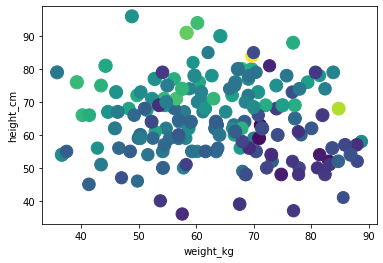

In [ ]:
#Scatter Plot
plt.scatter(BMD['age'], BMD['weight_kg'], BMD['height_cm'], BMD['bmd'])
plt.xlabel('weight_kg')
plt.ylabel('height_cm')
plt.show()

In [ ]:
#Set Features and Target Variable
X = BMD[['age', 'weight_kg', 'height_cm', 'bmd']]
Y = BMD['fracture']

In [ ]:
#Create classifier
logistic_regression= LogisticRegression(penalty='l1', solver='liblinear') #L1: Lasso Regression
#logistic_regression= LogisticRegression(penalty='l2', solver='liblinear') #L2: Ridge Regression

[0.] [[  0.02987952  -0.02837279   0.03980525 -10.02247992]]
Accuracy:  0.8579881656804734


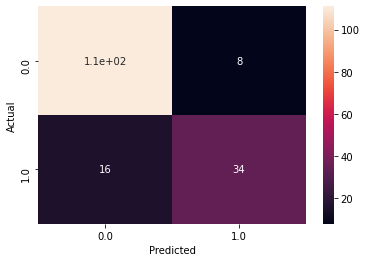

In [ ]:
logistic_regression.fit(X,Y)
Y_pred=logistic_regression.predict(X)

print(logistic_regression.intercept_, logistic_regression.coef_)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

In [ ]:
#print (X)
print (Y_pred)

print(classification_report(Y, Y_pred))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.]
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       119
         1.0       0.81      0.68      0.74        50

    accuracy                           0.86       169
   macro avg       0.84      0.81      0.82       169
weighted avg       0.85      0.86      0.85       169



Cross-Validation Accuracy [0.97058824 0.88235294 0.91176471 0.76470588 0.66666667]
Coefficients [0.] [[  0.02987952  -0.02837279   0.03980525 -10.02247992]]
Accuracy:  0.8579881656804734


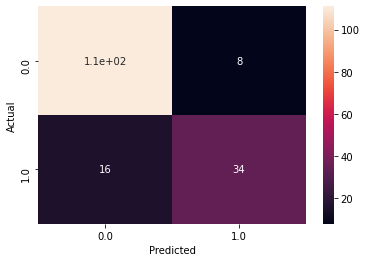

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       119
         1.0       0.81      0.68      0.74        50

    accuracy                           0.86       169
   macro avg       0.84      0.81      0.82       169
weighted avg       0.85      0.86      0.85       169



In [ ]:
#results = cross_val_score(logistic_regression, X, Y, cv=kfold)
results = cross_val_score(logistic_regression, X, Y, cv=5)
print('Cross-Validation Accuracy', results)

print('Coefficients', logistic_regression.intercept_, logistic_regression.coef_)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print(classification_report(Y, Y_pred))

Coefficients [0.] [[ 0.03592807 -0.02867861  0.03351223 -9.03690058]]
Accuracy:  0.8431372549019608


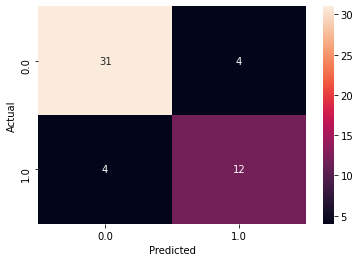

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        35
         1.0       0.75      0.75      0.75        16

    accuracy                           0.84        51
   macro avg       0.82      0.82      0.82        51
weighted avg       0.84      0.84      0.84        51



In [ ]:
#Split Features and Target Variables into Train and Test Sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

#Create classifier
logistic_regression= LogisticRegression(penalty='l1', solver='liblinear')
#logistic_regression= LogisticRegression(penalty='l2', solver='liblinear')
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)

print('Coefficients', logistic_regression.intercept_, logistic_regression.coef_)

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

#print (X_test)
#print (Y_pred)

print(classification_report(Y_test, Y_pred))

## Write-up


### In your write-up, provide an explanation of the results, including classification accuracy, the number of patients misclassified for each class/target, and which feature(s) are considered important based on the coefficient values
1. Classification accuracy: 0.85
2. Number of patients misclassified for each class/target: 16 patients misclassified as false negative and 8 patients misclassified as false positive
3. Feature(s) are considered important based on the coefficient values: only "bmd" is considered important with a coefficient value -10.02

### Observations about the dataset and/or results
This is a small dataset with 169 entries. As I aimed to classify people with/without fracture, I ran a logistic regression and found that bmd (bone mineral density) best predicts if a person has fracture with an accuracy of 0.85 

# Reference
AdmissionLogisticRegression.py, AdmissionLogisticRegressionDSCV.py, 
AdmissionLogisticRegressionDSTT.py scripts created by Dr. Renee Hendricks